# Multi-Axes signal processing test

In this notebook, we create 3 simple sine signals (60 Hz, 120 Hz and 240 Hz) and we inspect whether the spectrum function work correct.

## Step 1: Import libraries

In [135]:
import numpy as np
from caits.fe import spectrogram, istft, stft, melspectrogram, amplitude_to_db, db_to_amplitude, db_to_power, power_to_db
from caits.visualization import plot_spectrogram, plot_signal

## Step 2: Initialize signals

We create sine signals for a duration of 1 second and sampling frequency 1000. The resulting signals will be stored in a (1000, 3) numpy.array.

In [91]:
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second of data

# Two channels: 50 Hz and 120 Hz sine waves
signals = np.stack([
    np.sin(2 * np.pi * 60 * t),       # Channel 1
    np.sin(2 * np.pi * 120 * t),      # Channel 2
    np.sin(2 * np.pi * 240 * t)       # Channel 3
], axis=-1)  # Shape: (1000, 2)

signals.shape

(1000, 3)

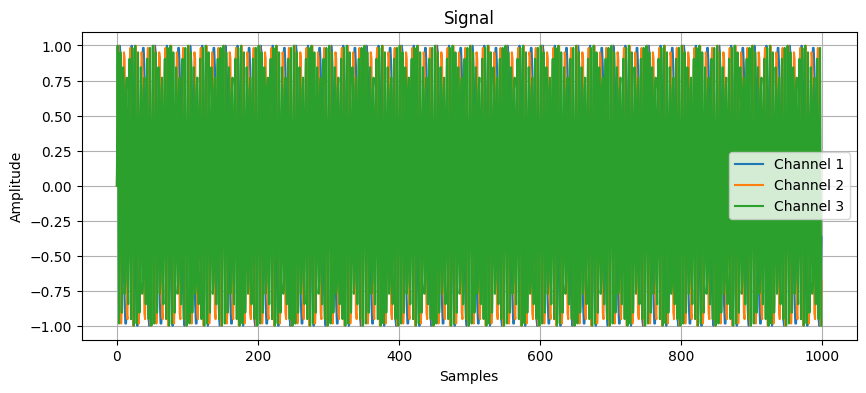

In [92]:
fig = plot_signal(signals, 1000)

## Step 3: Create and plot the spectrograms.

We want to check if multi-axis spectrogram creation works well.

In [93]:
n_fft = 500
hop_length = n_fft // 2
specs, sr = spectrogram(y=signals, n_fft=n_fft, hop_length=hop_length)

print(specs.shape)
print(sr)



(3, 251, 5)
500


In [94]:
f = np.fft.rfftfreq(501, 1 / 1000)
x = np.arange(specs.shape[2])



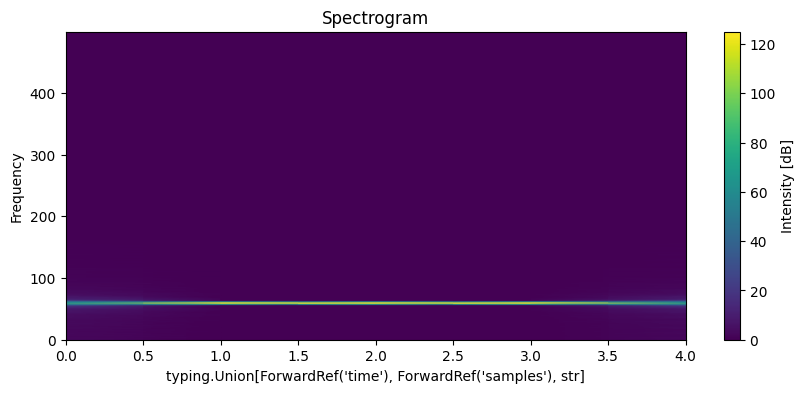

In [95]:
fig = plot_spectrogram(spec=specs[0, ...], f=f, x=x)


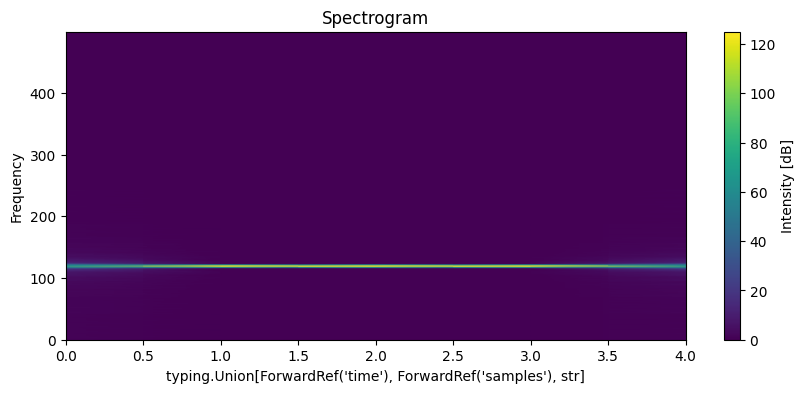

In [96]:
fig = plot_spectrogram(spec=specs[1, ...], f=f, x=x)


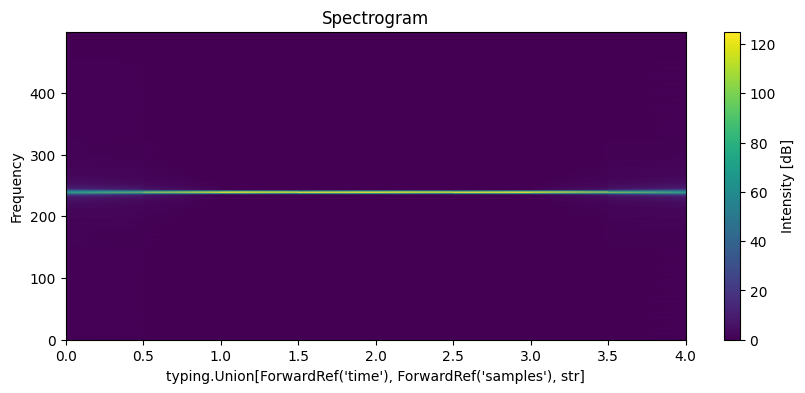

In [97]:
fig = plot_spectrogram(spec=specs[2, ...], f=f, x=x)


## Step 4: Check STFT and Inverse STFT

We want to check if STFT and Inverse STFT work well with multi-axis data

In [98]:
signals_stft = stft(signals, n_fft=n_fft, hop_length=hop_length)


In [99]:
isignals = istft(signals_stft, hop_length=hop_length)

isignals.shape

(1000, 3)

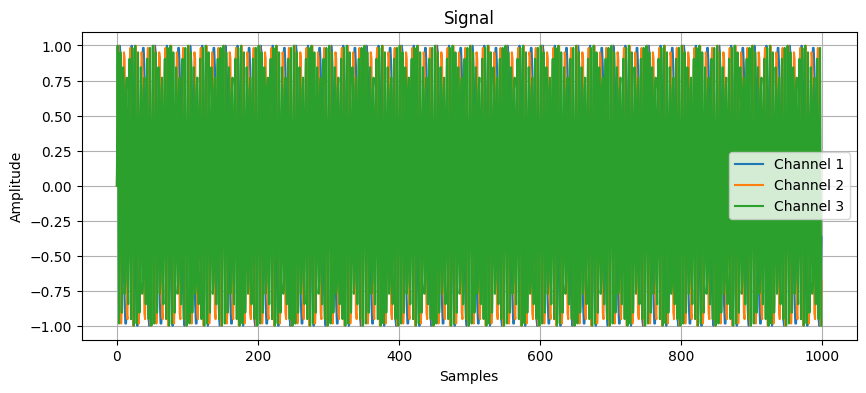

In [100]:
fig = plot_signal(isignals, fs)

# Uni-axes signal processing test

For the sake of completeness, we want to check that uni-axis transformations still work well. To do this, we sum the signals, sample-to-sample, and check the transformations.

## Step 1: Create the signal

In [101]:
final_signal = np.sum(signals, axis=1)

final_signal.shape


(1000,)

## Step 2: Plot the signal

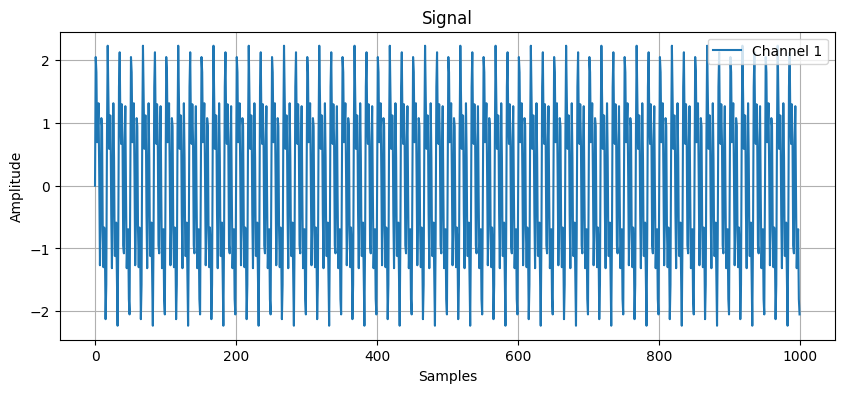

In [102]:
fig = plot_signal(final_signal, fs)

## Step 3: Create and plot the spectrogram of this signal

We want to validate that the dominant frequencies in the new signal will still be 50, 120 and 240 Hz.

In [103]:
final_spec, f = spectrogram(y=final_signal, n_fft=n_fft, hop_length=hop_length)
final_spec.shape

(251, 5)

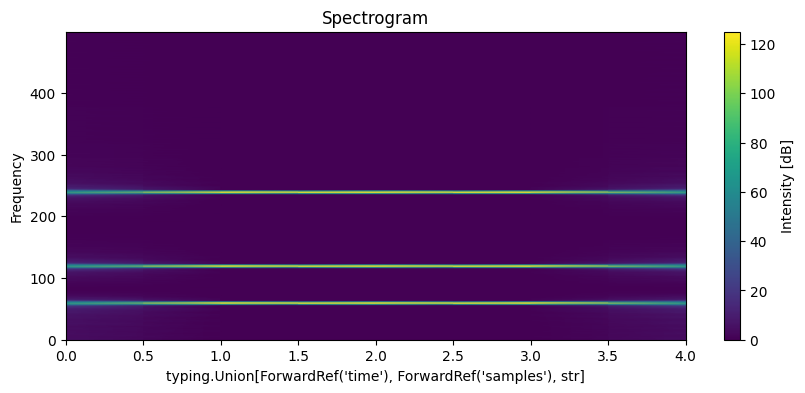

In [104]:
f = np.fft.rfftfreq(501, 1 / 1000)
x = np.arange(final_spec.shape[1])
fig = plot_spectrogram(spec=final_spec, f=f, x=x)

## Step 4: Check STFT and Inverse STFT

In [105]:
final_stft = stft(final_signal, n_fft=n_fft, hop_length=hop_length)
final_stft.shape


(251, 5)

In [106]:
final_isignal = istft(final_stft, hop_length=hop_length)
final_isignal.shape

(1000,)

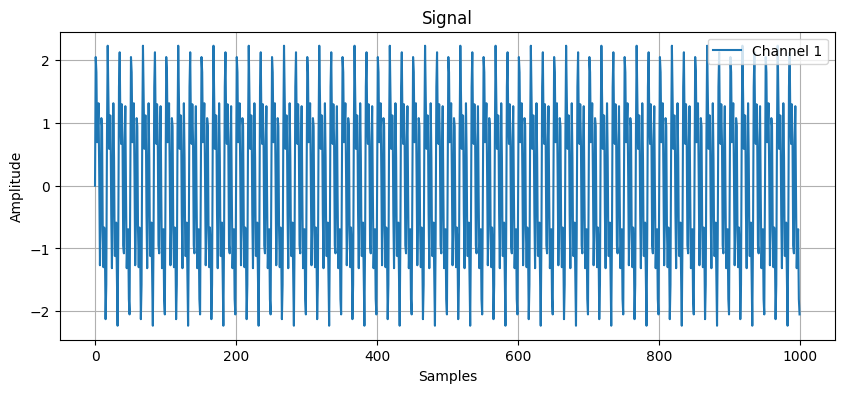

In [107]:
fig = plot_signal(final_isignal, fs)

# Check spectrum transformations for many spectrograms

In the first part, when calling spectrogram function for multi-axis data, we get a spectrogram for each signal inserted. In our case,
we get 3 spectrograms in a (3, 251, 5) numpy.array. We now want to check that transformations on this array will perform as expected.

## Step 1: Mel Spectrogram for each signal

In [108]:
melspecs = melspectrogram(y=signals, n_fft=n_fft, hop_length=hop_length)
melspecs.shape

(3, 128, 5)

In [109]:
f = np.fft.rfftfreq(255, 1 / 1000)
x = np.arange(melspecs.shape[2])

print(f.shape)
print(x.shape)



(128,)
(5,)


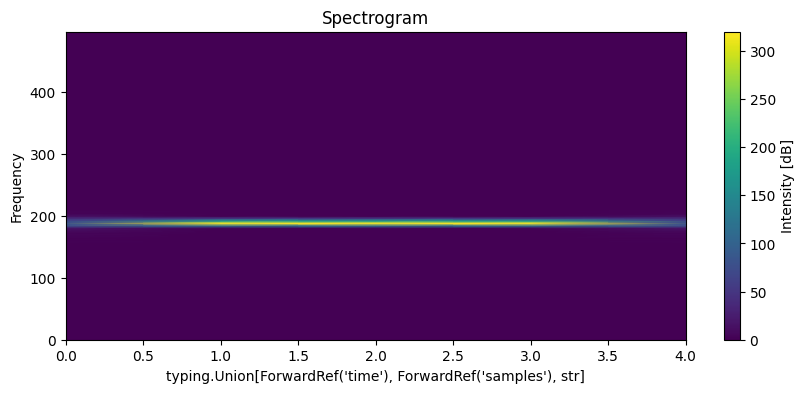

In [110]:
fig = plot_spectrogram(spec=melspecs[0, ...], f=f, x=x)


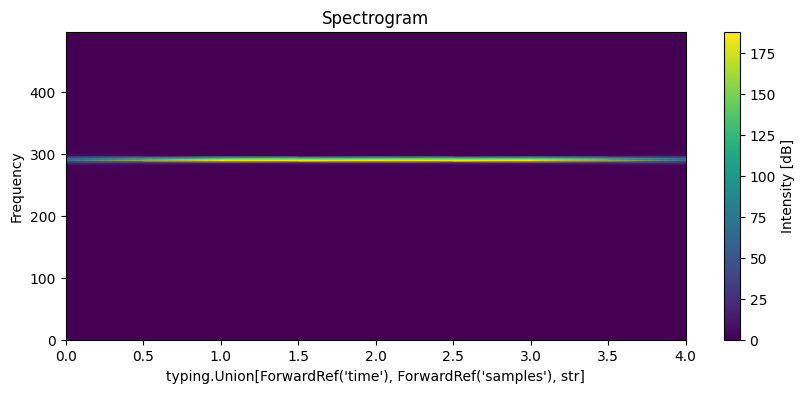

In [111]:
fig = plot_spectrogram(spec=melspecs[1, ...], f=f, x=x)


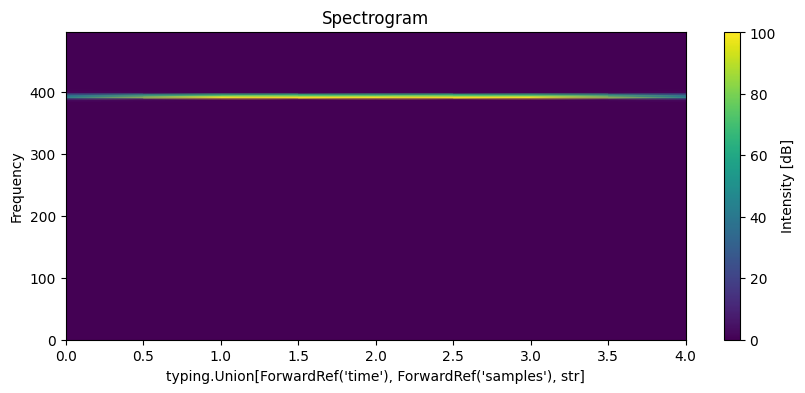

In [112]:
fig = plot_spectrogram(spec=melspecs[2, ...], f=f, x=x)


## Step 2: Mel Spectrogram for sum of signals

In [113]:
final_melspec = melspectrogram(final_signal, n_fft=n_fft, hop_length=hop_length)
final_melspec.shape

(128, 5)

In [115]:
f = np.fft.rfftfreq(255, 1 / 1000)
x = np.arange(final_melspec.shape[1])

print(f.shape)
print(x.shape)


(128,)
(5,)


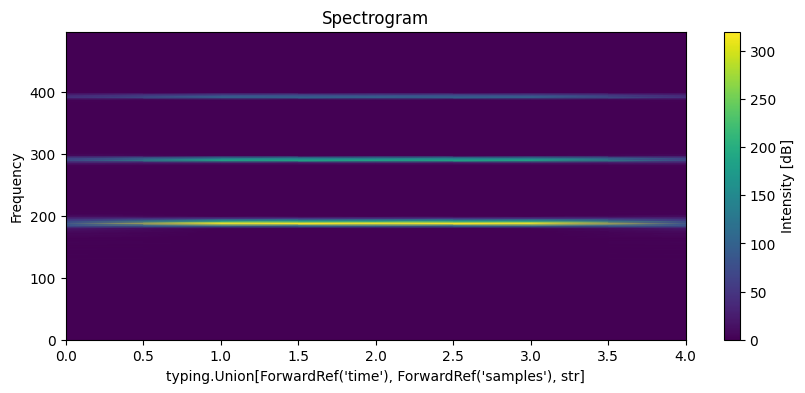

In [116]:
fig = plot_spectrogram(spec=final_melspec, f=f, x=x)


## Step 3: Amplitude to db

In [119]:
S_db = amplitude_to_db(specs)
S_db.shape

(3, 251, 5)

In [121]:
f = np.fft.rfftfreq(501, 1 / 1000)
x = np.arange(melspecs.shape[2])

print(f.shape)
print(x.shape)


(251,)
(5,)


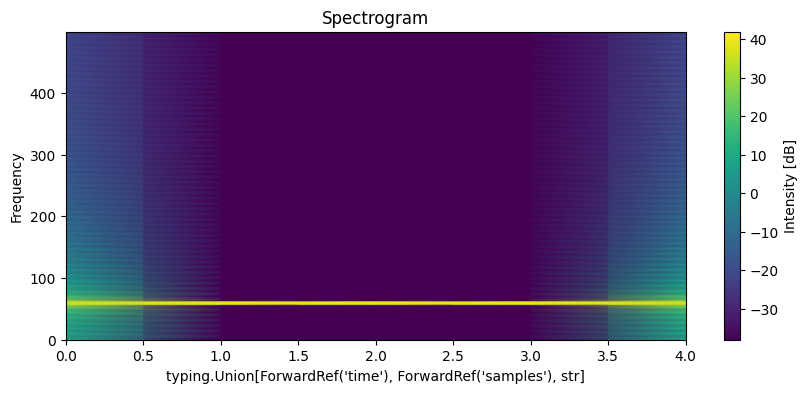

In [123]:
fig = plot_spectrogram(spec=S_db[0, ...], f=f, x=x)

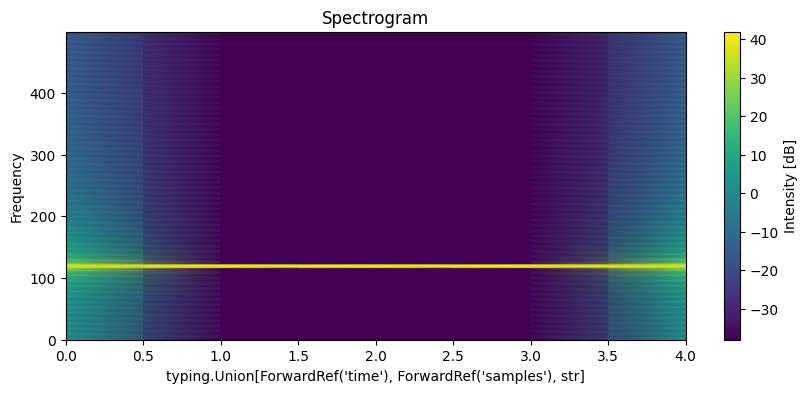

In [124]:
fig = plot_spectrogram(spec=S_db[1, ...], f=f, x=x)


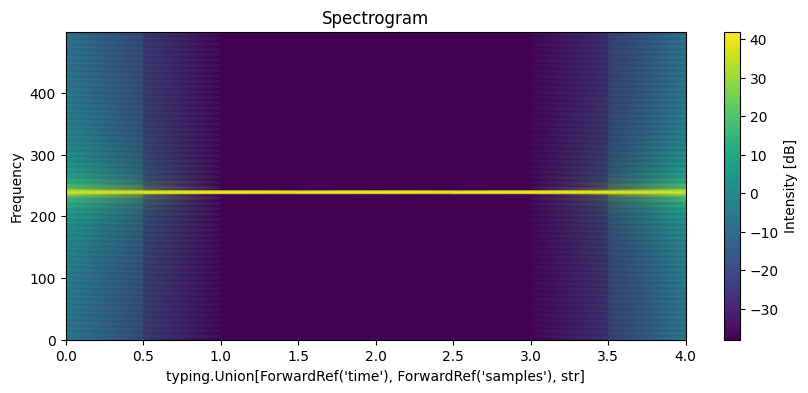

In [125]:
fig = plot_spectrogram(spec=S_db[2, ...], f=f, x=x)


## Step 4: DB to amplitude

In [127]:
S_amp = db_to_amplitude(S_db)
S_amp.shape

(3, 251, 5)

In [129]:
f = np.fft.rfftfreq(501, 1 / 1000)
x = np.arange(S_amp.shape[2])

print(f.shape)
print(x.shape)


(251,)
(5,)


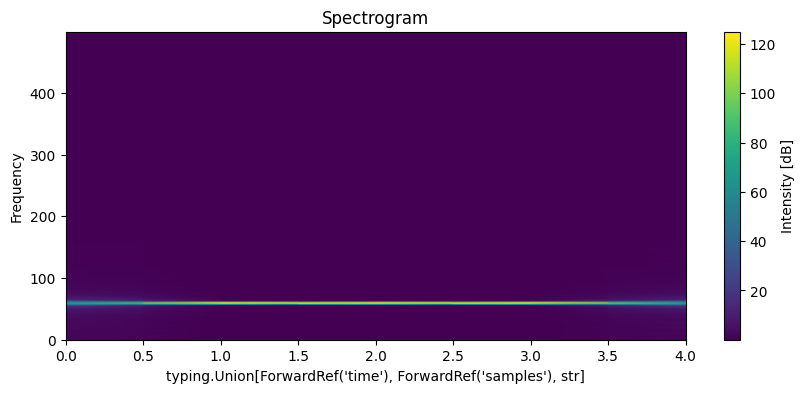

In [130]:
fig = plot_spectrogram(spec=S_amp[0, ...], f=f, x=x)


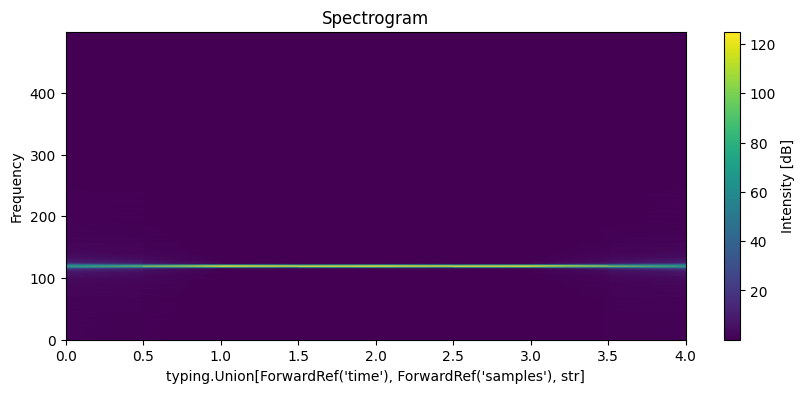

In [132]:
fig = plot_spectrogram(spec=S_amp[1, ...], f=f, x=x)


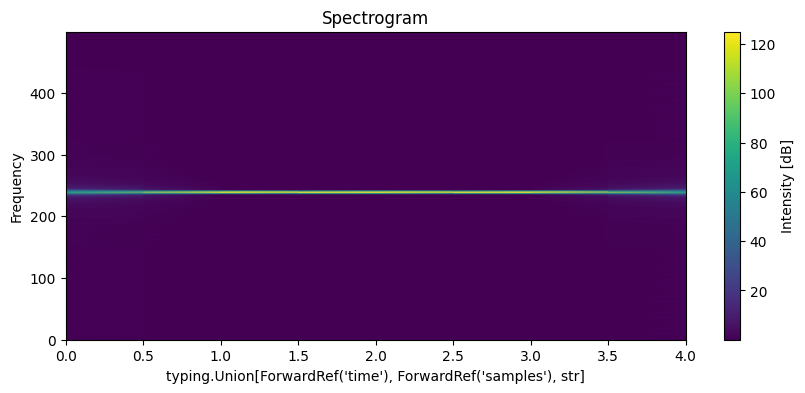

In [133]:
fig = plot_spectrogram(spec=S_amp[2, ...], f=f, x=x)


## Step 5: DB to power


In [136]:
S_pow = db_to_power(S_db)
S_pow.shape

(3, 251, 5)

In [137]:
f = np.fft.rfftfreq(501, 1 / 1000)
x = np.arange(S_amp.shape[2])

print(f.shape)
print(x.shape)


(251,)
(5,)


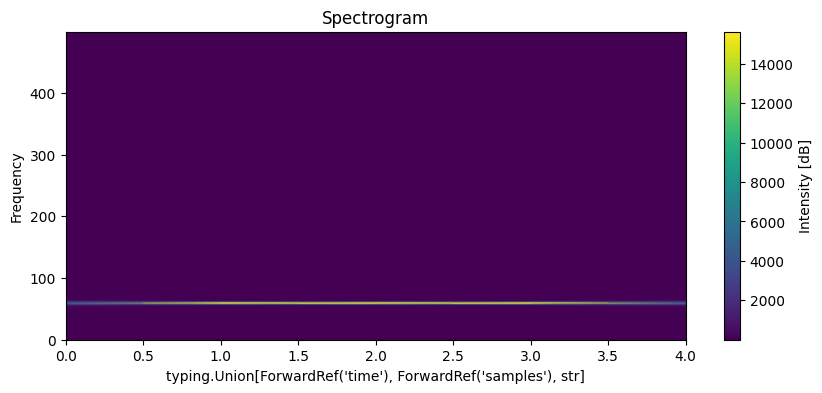

In [139]:
fig = plot_spectrogram(spec=S_pow[0, ...], f=f, x=x)


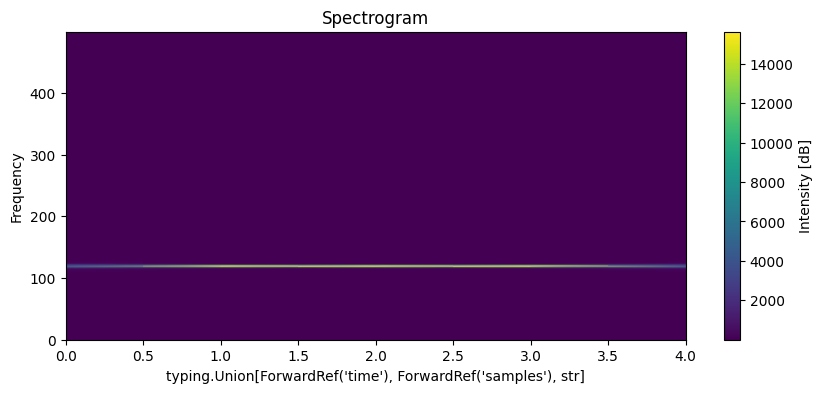

In [140]:
fig = plot_spectrogram(spec=S_pow[1, ...], f=f, x=x)


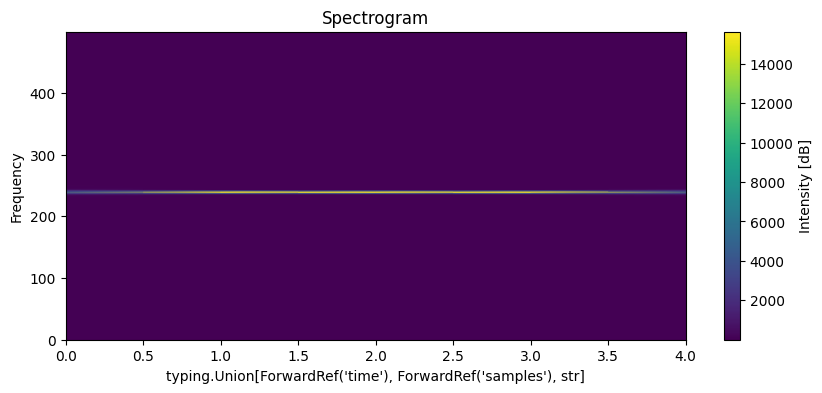

In [141]:
fig = plot_spectrogram(spec=S_pow[2, ...], f=f, x=x)


## Step 6: Power to dB

In [142]:
S_db_inv = power_to_db(S_pow)
S_db_inv.shape

(3, 251, 5)

In [143]:
f = np.fft.rfftfreq(501, 1 / 1000)
x = np.arange(S_amp.shape[2])

print(f.shape)
print(x.shape)


(251,)
(5,)


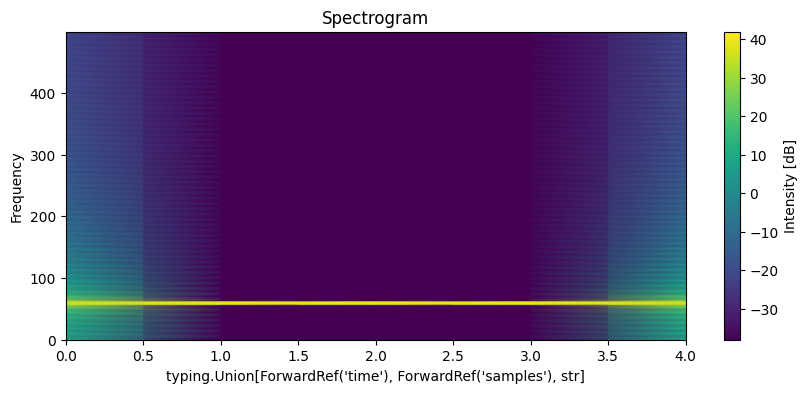

In [144]:
fig = plot_spectrogram(spec=S_db_inv[0, ...], f=f, x=x)


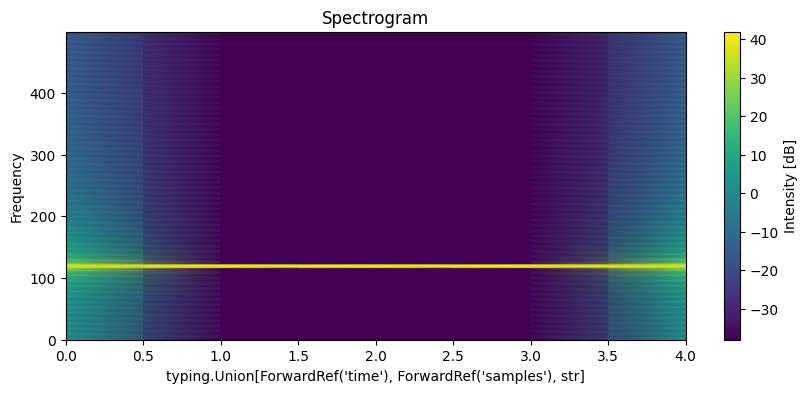

In [145]:
fig = plot_spectrogram(spec=S_db_inv[1, ...], f=f, x=x)



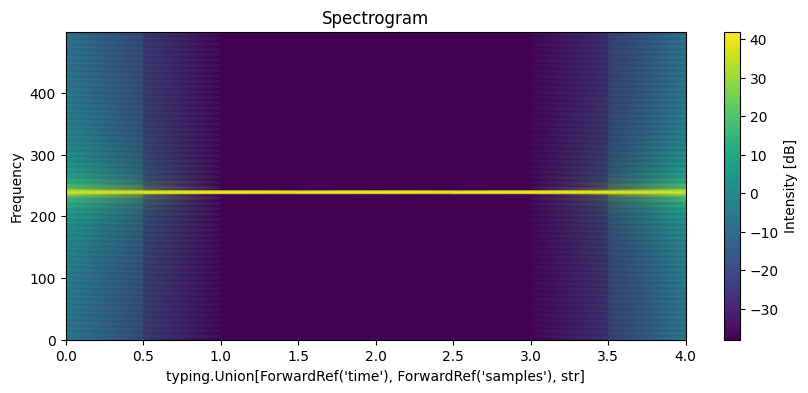

In [146]:
fig = plot_spectrogram(spec=S_db_inv[2, ...], f=f, x=x)


# Final Remarks

As we can see until now, the functions of the _spectrum.py file work fine for uni-axis and multi-axis data.